In [1]:
import kagglehub
path = kagglehub.dataset_download("mirichoi0218/insurance")

100%|██████████| 16.0k/16.0k [00:00<00:00, 23.2MB/s]

Extracting files...


In [2]:
import os

# List the contents of the 'path' directory
file_list = os.listdir(path)
print(f"Files in '{path}':\n{file_list}")

Files in '/root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1':
['insurance.csv']


In [4]:
import pandas as pd

file_to_load = os.path.join(path, 'insurance.csv') # Adjust 'insurance.csv' if needed
df = pd.read_csv(file_to_load)

# Display the first 5 rows of the DataFrame
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Basic Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
display(df.describe(include='all'))

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Numerical distribution and outliers
Visualize the distribution of numerical features (age, bmi, children, charges) using histograms and box plots to identify their spread, central tendency, and potential outliers.

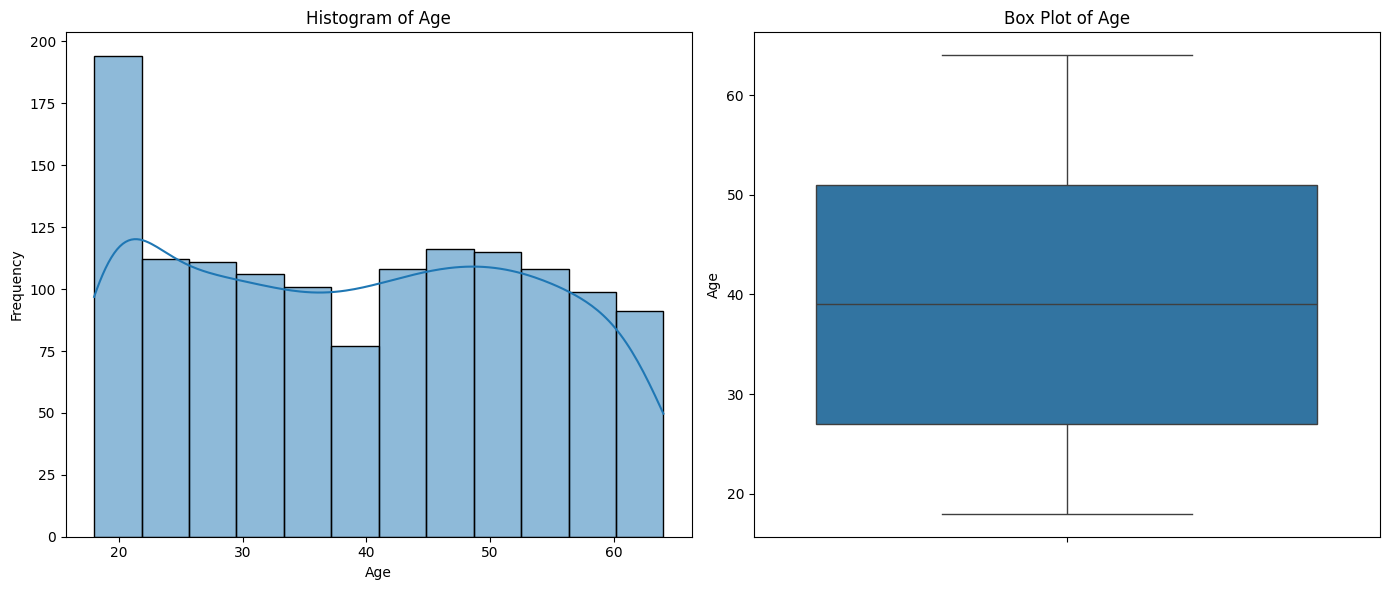

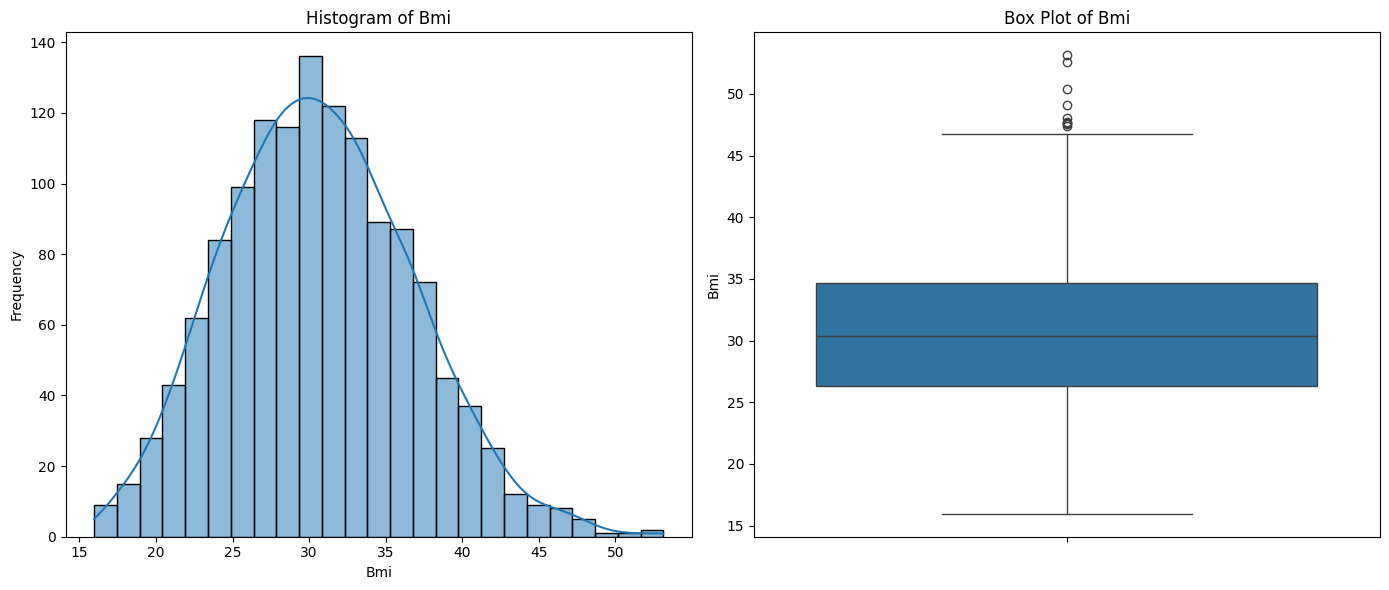

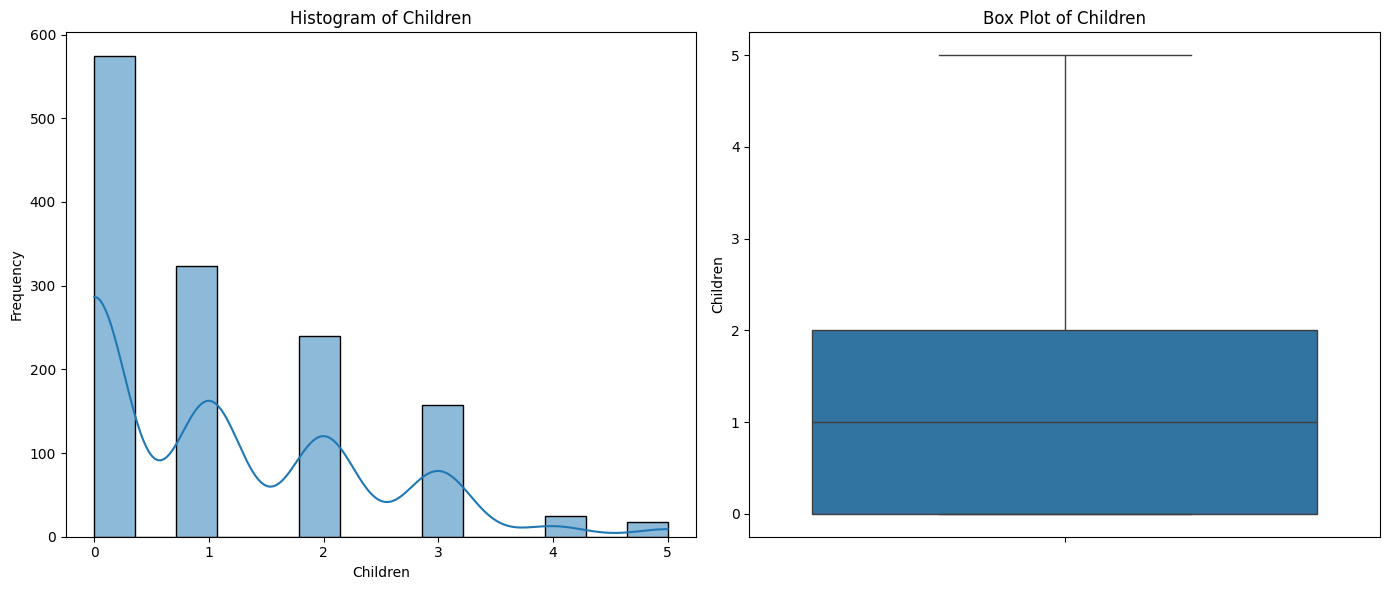

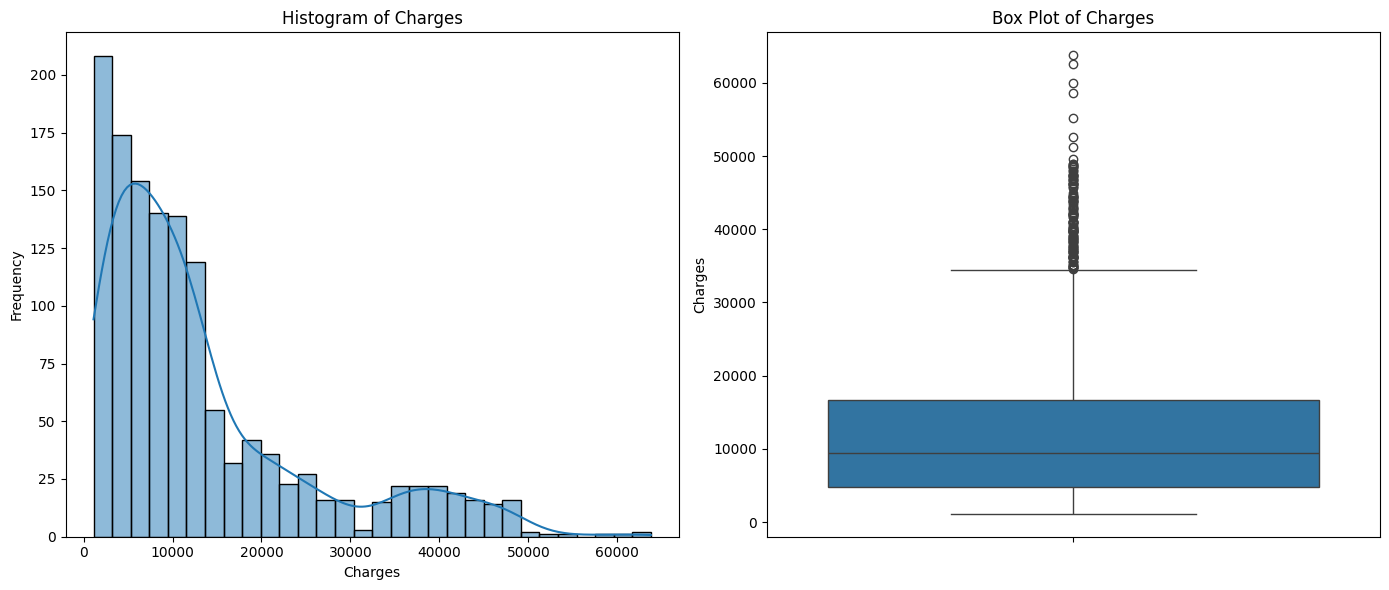

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'bmi', 'children', 'charges']
for feat in numerical_features:
  plt.figure(figsize=(14,6))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df[feat], kde=True)
  plt.title(f'Histogram of {feat.capitalize()}')
  plt.xlabel(feat.capitalize())
  plt.ylabel('Frequency')

  # Box Plot
  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[feat])
  plt.title(f'Box Plot of {feat.capitalize()}')
  plt.ylabel(feat.capitalize())

  plt.tight_layout()
  plt.show()






There are many outliers for Charges and BMI.


# Categorical features distribution

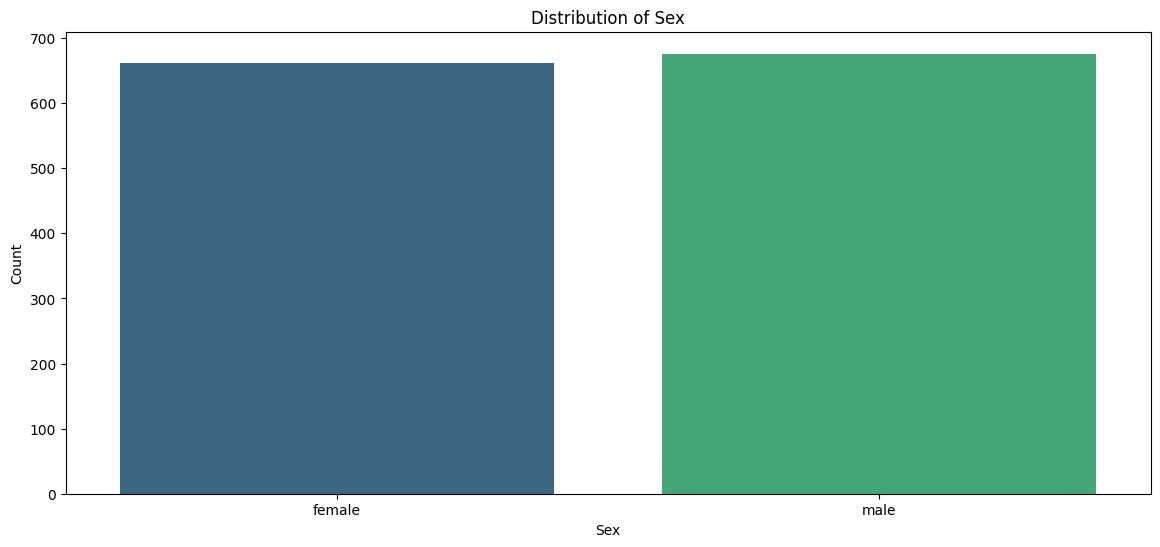

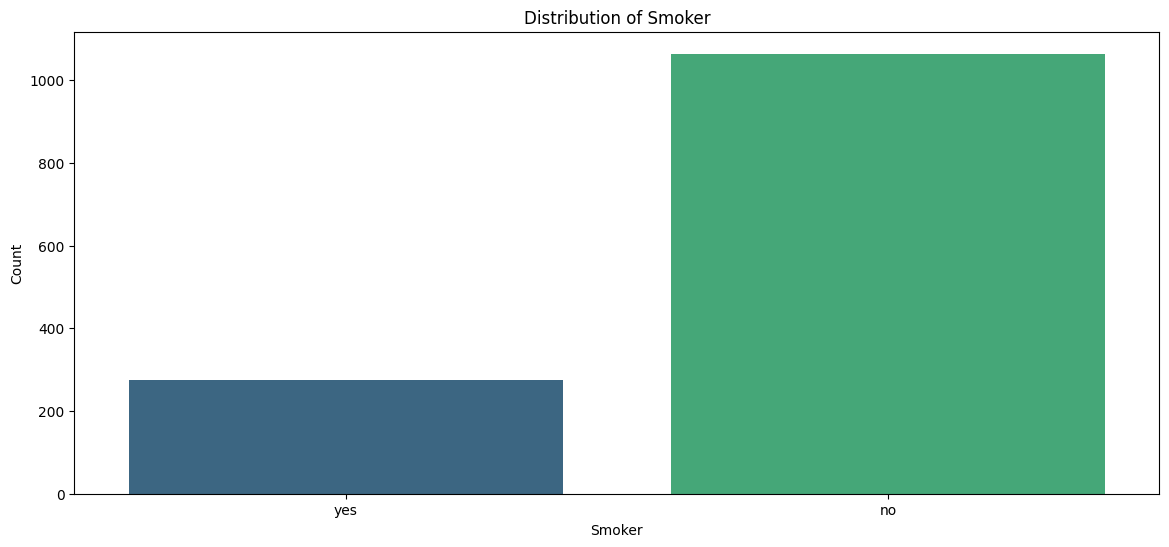

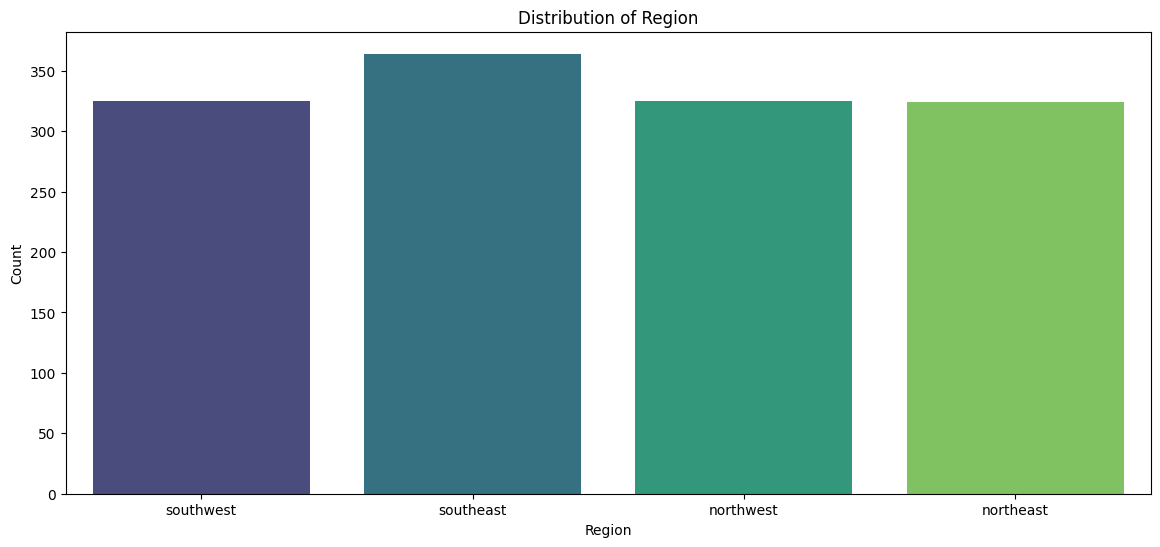

In [12]:
categorical_features = ['sex', 'smoker', 'region']

for feat in categorical_features:
  plt.figure(figsize=(14,6))
  sns.countplot(x=feat, data=df, palette='viridis', hue=feat, legend=False)
  plt.title(f'Distribution of {feat.capitalize()}')
  plt.xlabel(feat.capitalize())
  plt.ylabel('Count')
  plt.show()

- Both **sexes** have similar numbers of counts.
- Four **regions** have similar numbers of counts.
- The data is skewed toward non-smokers.

# Relationship of features with target

## Relationship between numerical features and charges by smoker status

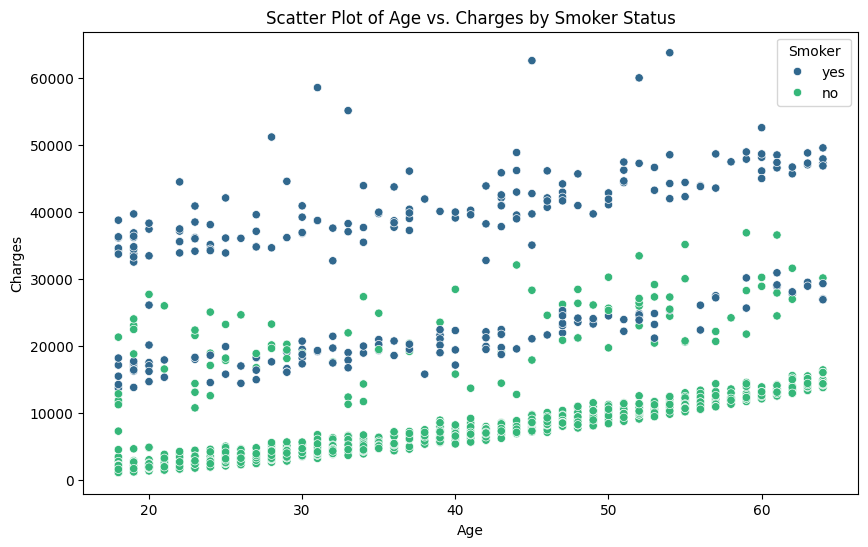

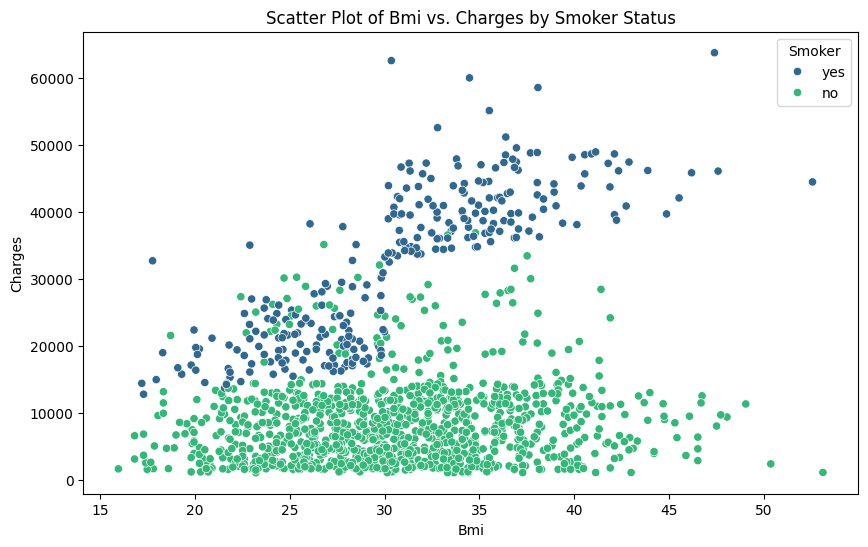

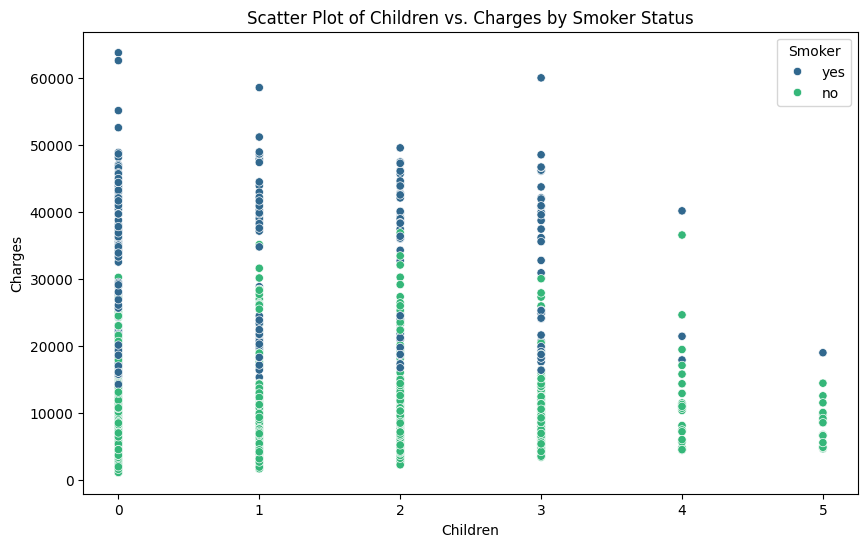

In [14]:
for col in numerical_features:
  if col != 'charges':
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='charges', hue='smoker', data=df, palette='viridis')
    plt.title(f'Scatter Plot of {col.capitalize()} vs. Charges by Smoker Status')
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')
    plt.legend(title='Smoker')
    plt.show()

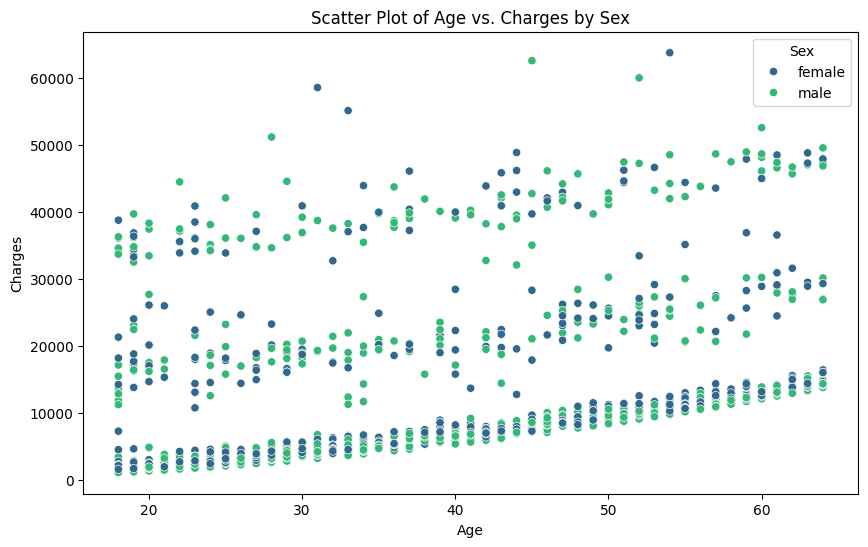

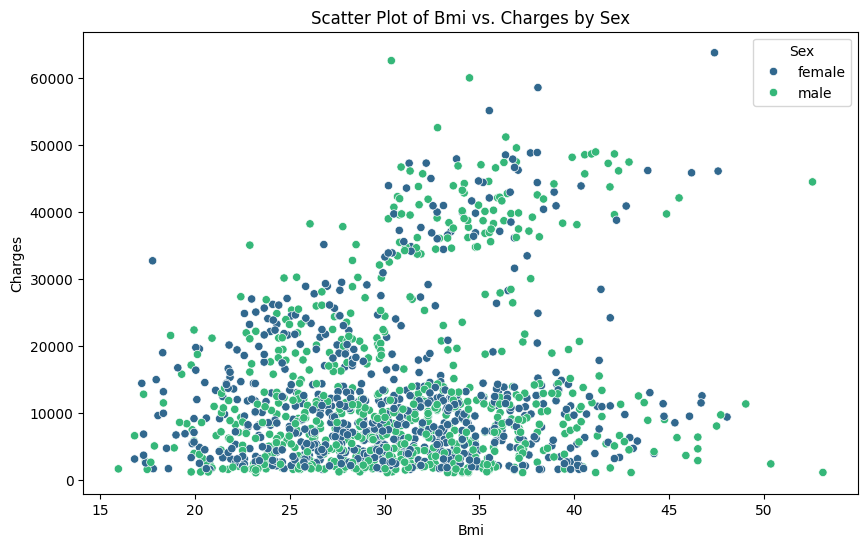

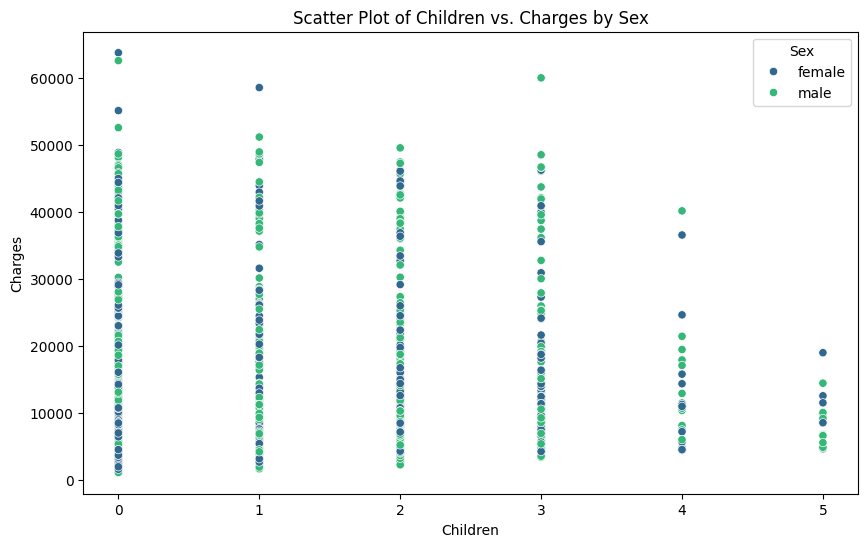

In [23]:
for col in numerical_features:
  if col != 'charges':
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='charges', hue='sex', data=df, palette='viridis')
    plt.title(f'Scatter Plot of {col.capitalize()} vs. Charges by Sex')
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')
    plt.legend(title='Sex')
    plt.show()

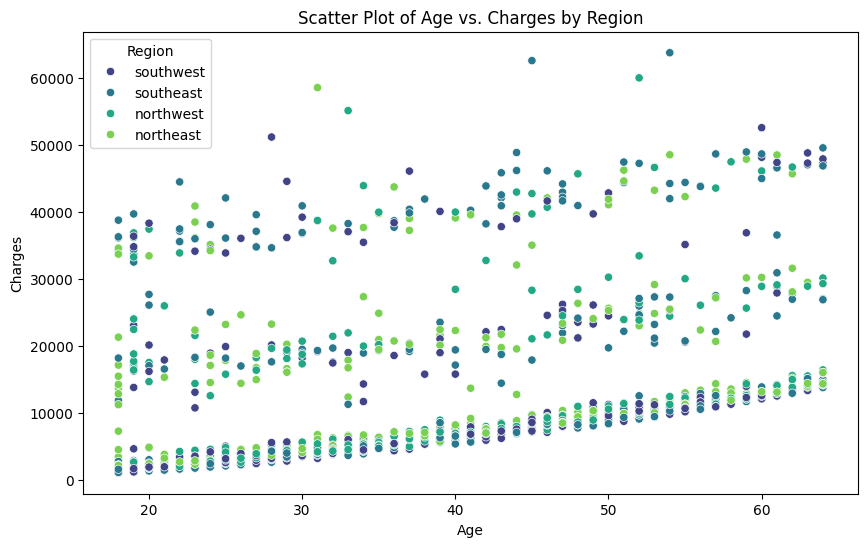

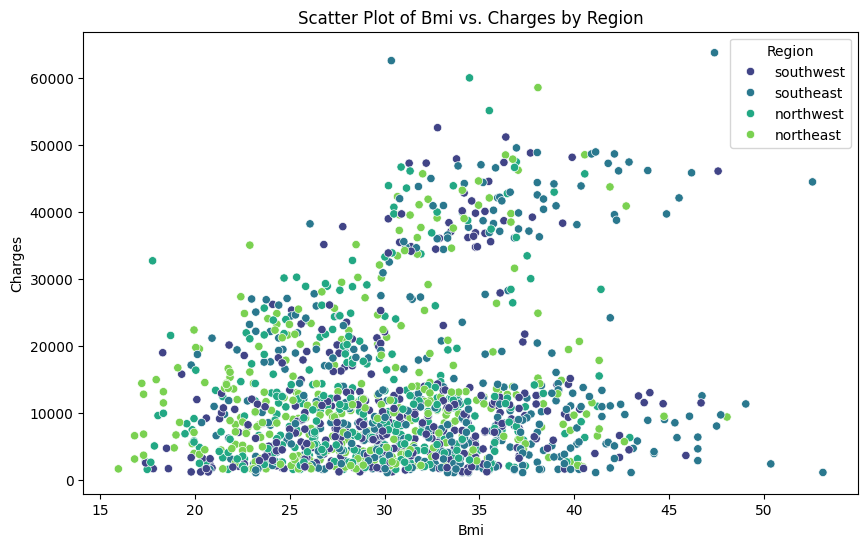

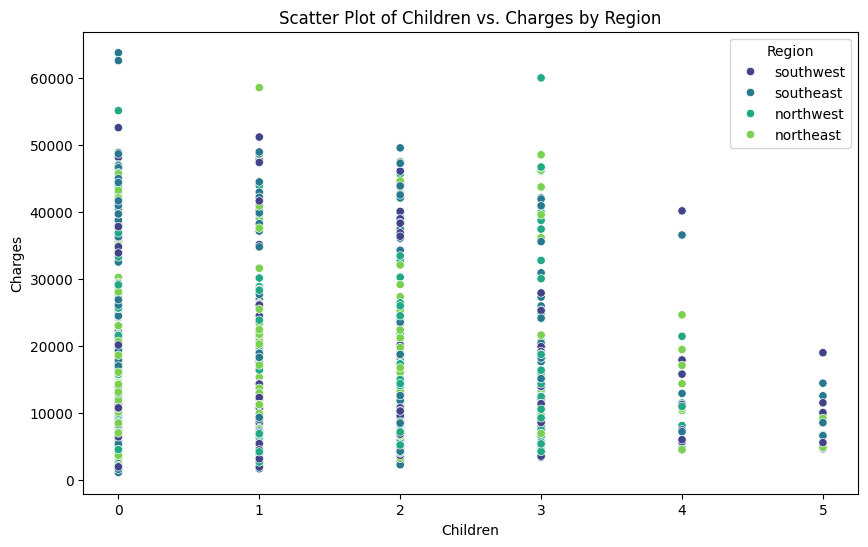

In [22]:
for col in numerical_features:
  if col != 'charges':
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='charges', hue='region', data=df, palette='viridis')
    plt.title(f'Scatter Plot of {col.capitalize()} vs. Charges by Region')
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')
    plt.legend(title='Region')
    plt.show()

## Relationship between charge and catagorical features

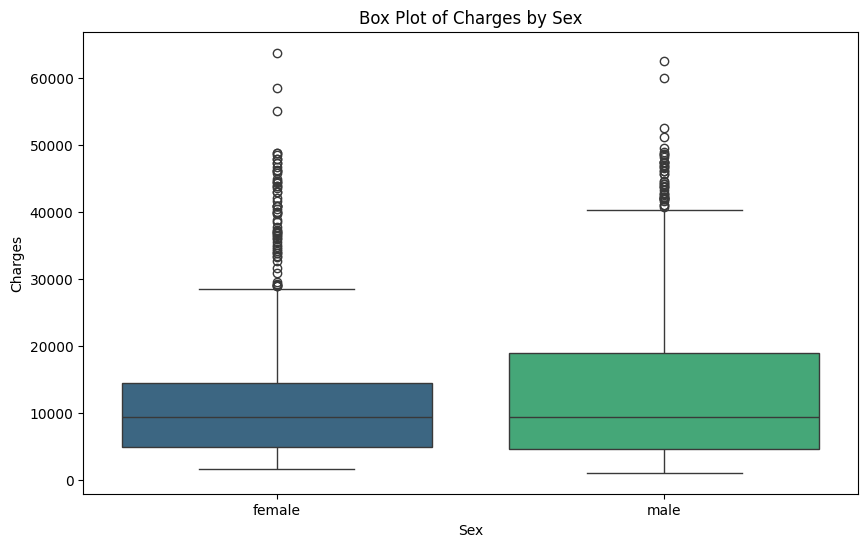

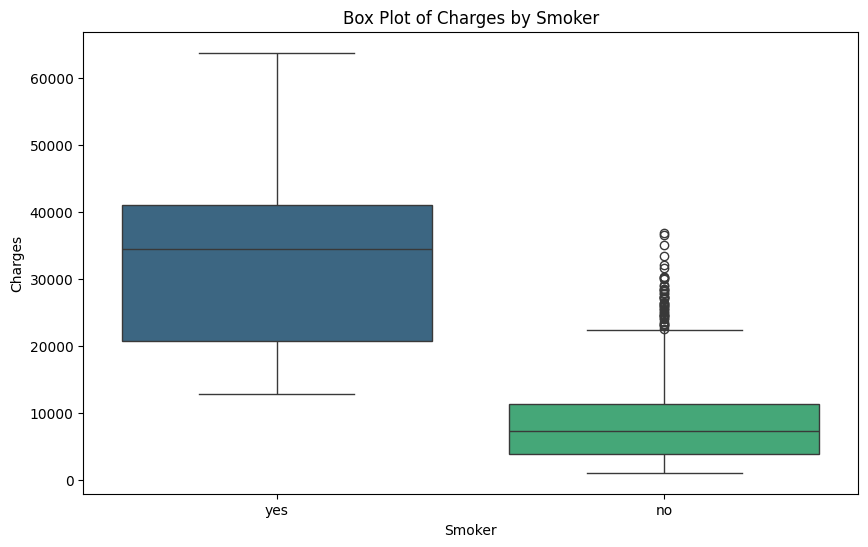

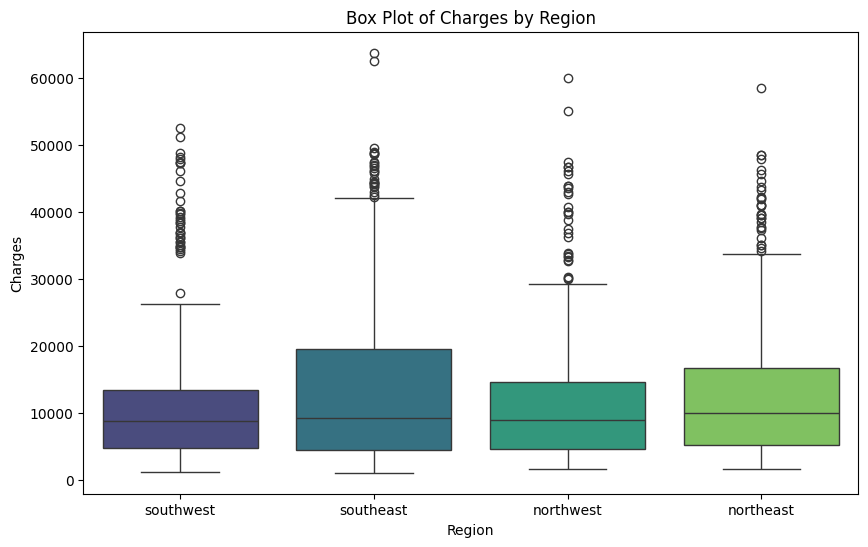

In [20]:
for feat in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feat, y='charges', data=df, palette='viridis', hue=feat, legend=False)
    plt.title(f'Box Plot of Charges by {feat.capitalize()}')
    plt.xlabel(feat.capitalize())
    plt.ylabel('Charges')
    plt.show()

# Correlation matrix

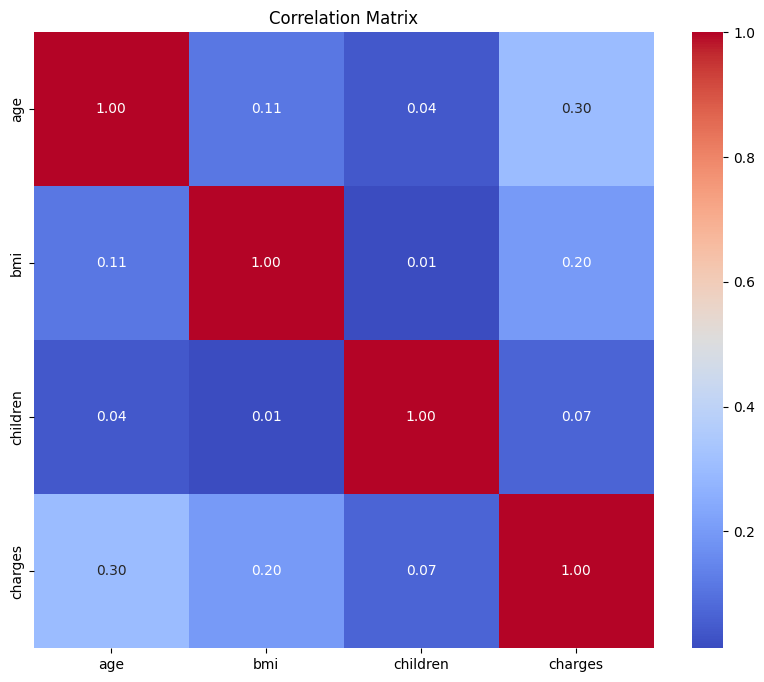

In [21]:
correlation_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[correlation_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()